# ML : Übung 1 Explorative Analyse und Vorverarbeitung
-----------------------------------


# 1. Explorative Analyse des Datensatzes “Boston Housing”

>###    Einbinden der Packages
Import zweier Standardpakete für die Datenanalyse: Numpy für mehrdimensionale Arrays, Pandas für Datenanalyse in Tabellen.

In [1]:
!pip install pandas numpy wget matplotlib

import pandas as pd
import numpy as np
import matplotlib
import os
import wget

#np.__version__, pd.__version__

>## Einlesen der Data
Im ersten Schritt werden die Daten eingelesen.
>### Direkter Download
Direkter Download vom ics.uci.de,
automatischer Import in Pandas-Dataframe,
Abruf des Downloaddatums. 

In [2]:
url    = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols   = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','TGT']
boston = pd.read_csv(url , sep=' ', skipinitialspace=True , header=None ,names=cols , index_col=False)
dateDownloaded = !date #Calling Linux
dateDownloaded

['Mo 26. Okt 08:24:50 CET 2020']

>## Caching der Daten
Da der Datensatz größer ist wird zuerst ein caching der Daten durchgeführt. 

In [3]:
if not os.path.isfile('housing.data'):
    print("Downloading file...\n")
    wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 'housing.data')
else:
    print("File exists\n")
!ls -11

File exists

foods-2011-10-03.json
foods-2011-10-03.json.zip
housing.data
uebung01.ipynb
uebung02.ipynb


## Explorative Analyse
-----------------------------------

>### Darstellung der Daten als Pandas-Dataframe
Darstellung des Datensatzes als Datensatzes als Pandas-Dataframe (Tabelle der ersten und letzten 30 Einträge, Anzahl Reihen und Spalten). Konvention: Variablen sind die Spalten, einzelne Messungen die Zeilen.

In [4]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's

Alle Variablen sind numerische Variablen außer **CHAS**, die zwar kategorisch ist aber numerisch als *int64* dargestellt wird (= 1 if tract bounds river; 0 otherwise). 

Anzahl der Zeilen und Spalten anzeigen.

In [5]:
np.shape(boston)

(506, 14)

=> Dieser Datensatz besteht aus 506 Zeilen (Samples) mit jeweils 14 Spalten (Features).

Anzeige der einzelnen Spaltennamen mit Datentyp.




In [6]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TGT        float64
dtype: object

>### Aufbereitung des Datensatzes
Überprüfen, ob Tabelle NaN enthält und ewentuelle Entfernung dieser.      
Überprüfen, ob Zeilen bzw. Messungen doppelt vorkommen und ewentuelle Entfernung dieser.


In [7]:
if boston.isna().values.any():
  boston = boston.dropna()

if boston.duplicated().any():
  boston = boston.drop_duplicates()

print(np.shape(boston))

(506, 14)


>### Statistische Analyse des Datensatzes
Statistische Beschreibung der numerischen Variablen mit Dataframe.describe() (count: Anzahl Messungen, mean: Mittelwert, std: Standardabweichung, min: Minimum, 25%: 25-Perzentil, ...)

In [8]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Korrelation der Spalten (Features).

In [9]:
correlation = boston.corr() # method ='pearson' ;or 'kendall'
correlation.style.background_gradient(cmap='PiYG').set_precision(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


Als Ergebnis kann man festhalten, dass die Varable 'LSTAT' mit -0.738 die größte negative Korrelation zum Hauspreis ('TGT') aufweist. Für eine Vorhersage ist die Variable 'RM' mit einer postiven Korrelation von 0.695 auch gut geeignet. Absolut ungeeignet für eine weitere Analsyse ist die Varaible 'CHAS' mit einem Wert von 0.175 für die Korrelation.

Streumatrix über alle numerischen Variablen des Datensatzes mit der Panda scattermatrix().

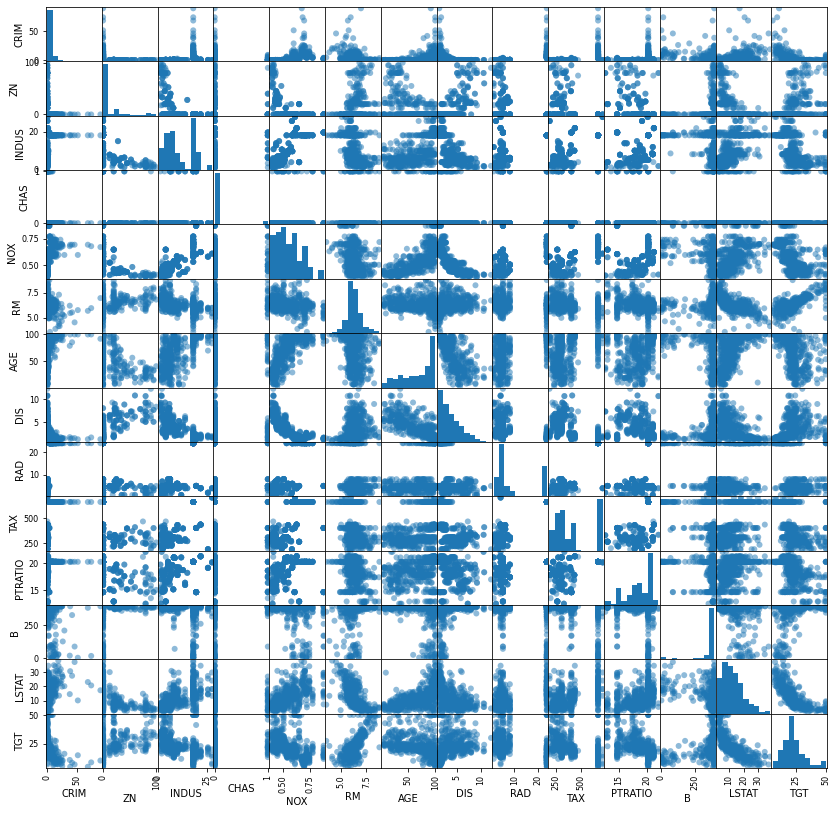

In [10]:
pd.plotting.scatter_matrix(boston, figsize=(14,14), marker='o');

Hier das Scatter Plot zu 'TGT' und 'LSTAT' im einzeln dargestellt:

<AxesSubplot:xlabel='LSTAT', ylabel='TGT'>

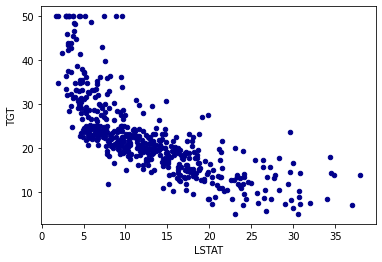

In [11]:
pd.DataFrame({'TGT': boston['TGT'], 'LSTAT': boston['LSTAT']}).plot.scatter(x='LSTAT', y='TGT', c='DarkBlue')

# 2. Datenvorverarbeitung mit Pandas: Food Nutrient Database

>###    Einbinden der Packages
Import der Standardpakete für die Datenanalyse: Numpy für mehrdimensionale Arrays, Pandas für Datenanalyse in Tabellen, os und wget für caching der Daten, zipfile und json für die Verarbeitung des Datensatzes und random für die Generierung von Zufallswerten.

In [12]:
import pandas as pd
import numpy as np
import os
import wget
import zipfile
import json
import random

>## Caching der Daten & Entpacken der ZIP-Datei
Da der Datensatz größer ist wird zuerst ein caching der Daten durchgeführt. Daraufhin wird der Datensatz aus der ZIP-Datei entpackt.

In [13]:
if not os.path.isfile('foods-2011-10-03.json.zip'):
    print("Downloading file...\n")
    wget.download('http://www-home.fh-konstanz.de/~oduerr/data/foods-2011-10-03.json.zip', 'foods-2011-10-03.json.zip')
if not os.path.isfile('foods-2011-10-03.json'):    
    print("Extracting zip file...\n")
    with zipfile.ZipFile('foods-2011-10-03.json.zip', 'r') as zip_ref:
        zip_ref.extractall("./")
else:
    print("File exists\n")

!ls -11

File exists

foods-2011-10-03.json
foods-2011-10-03.json.zip
housing.data
uebung01.ipynb
uebung02.ipynb


>## Umwandlung Datensatz in geeignetes Dateiformat
Der im JSON-Dateiformat vorliegende Datensatz wird geöffnet und in ein geeignete Dateiformat (Python-Dictionary) für die weitere Verarbeitung umgewandelt. Ausgabe der Anzahl von Einträgen im Python-Dictionary.

In [14]:
food_data = {}
with open('foods-2011-10-03.json') as json_file:
    food_data = json.load(json_file)
    print("Anzahl Einträge im Python-Dictionary:", len(food_data))

Anzahl Einträge im Python-Dictionary: 6636


>## Auswahl beliebiges Nahrungmittel
Auswahl eines zufälligen Nahrungsmittel aus dem Python-Dictionary und Ausgabe  der Namen der Einträge.

In [15]:
random.seed(42)

random_food = random.choice(food_data)
random_food.keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

>## Auswahl beliebiger Eintrag 'Nährstoffliste'
Auswahl und Ausgabe eines zufälligen Eintrages der 'Nährstoffliste' (nutrients) aus dem Python-Dictionary unter dem Eintrag 'nutrients'.

In [16]:
random.choices(random_food['nutrients'], k=3)

[{'value': 0.0, 'units': 'g', 'description': 'Lactose', 'group': 'Sugars'},
 {'value': 38.0,
  'units': 'mg',
  'description': 'Phytosterols',
  'group': 'Other'},
 {'value': 0.86,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'}]

>## Umwandlung in einheitliche Tabelle für explorative Analyse
Teile dieser hierarchischen Struktur werden in eine einheitliche Tabelle umgewandelt, um die explorative Analyse durchführen zu können.

>### Kopieren der Felder 'description', 'group', 'id', 'manufacturer' in den  DataFrame 'info'.

In [17]:
# info = (pd.DataFrame.from_dict(food_data)).drop(columns=['tags', 'portions','nutrients'])
info = pd.DataFrame([{k: v for k, v in d.items() if k in ['description', 'group', 'id', 'manufacturer']} for d in food_data])
info

,id,description,manufacturer,group
0,1008,"Cheese, caraway",,Dairy and Egg Products
1,1009,"Cheese, cheddar",,Dairy and Egg Products
2,1018,"Cheese, edam",,Dairy and Egg Products
3,1019,"Cheese, feta",,Dairy and Egg Products
4,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products
...,...,...,...,...
6631,42161,"Bologna, beef, low fat",,Sausages and Luncheon Meats
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",,Sausages and Luncheon Meats
6633,43408,"Babyfood, juice, pear",None,Baby Foods
6634,43539,"Babyfood, dessert, banana yogurt, strained",None,Baby Foods


>### Kopieren alle Nährstofflisten in ein Array von DataFrames.
 Sowie Anhängen der entsprechenden ID des Nahrungsmittels als eigene Spalte.

In [18]:
nutrients = []

for food in food_data:
  nutrients_list = food['nutrients'].copy()

  for d in nutrients_list:
    d.update({'id': food['id']})

  nutrients.extend(nutrients_list)

>### Vereinigung des Array's zu einem großen DataFrame nutrients (389355 Einträge).

In [19]:
nutrients = pd.DataFrame(nutrients)
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


>### Entfernen aller Duplikate aus DataFrame.

In [20]:
if nutrients.duplicated().any():
  nutrients = nutrients.drop_duplicates()

np.shape(nutrients)

(375176, 5)

>### Umbenennen uneindeutiger Felder in beiden DataFrames.

In [21]:
info = info.rename(columns={'description': 'food_desc', 'group': 'food_group'})
nutrients = nutrients.rename(columns={'description': 'nutrient_desc', 'group': 'nutrient_group'})

>### Vereinigung der DataFrames 
Mithilfe der Funktion pd.merge(nutrients, info, on='id', how='outer') anhand der Nahrungsmittel-ID.
Ergebnisüberprüfung der Datenmanipulation mit DataFrame.head()

In [22]:
food_df = pd.merge(nutrients, info, on='id', how='outer')
food_df.head()

,value,units,nutrient_desc,nutrient_group,id,food_desc,manufacturer,food_group
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",,Dairy and Egg Products
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",,Dairy and Egg Products
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",,Dairy and Egg Products
3,3.28,g,Ash,Other,1008,"Cheese, caraway",,Dairy and Egg Products
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",,Dairy and Egg Products


>## Explorative Analyse

>### Auslesen aller Tabelleneinträge mit Nährstoff 'Zink'

In [23]:
zinc_food_df = food_df[food_df['nutrient_desc'] == 'Zinc, Zn']
zinc_food_df

,value,units,nutrient_desc,nutrient_group,id,food_desc,manufacturer,food_group
14,2.94,mg,"Zinc, Zn",Elements,1008,"Cheese, caraway",,Dairy and Egg Products
75,3.11,mg,"Zinc, Zn",Elements,1009,"Cheese, cheddar",,Dairy and Egg Products
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",,Dairy and Egg Products
222,2.88,mg,"Zinc, Zn",Elements,1019,"Cheese, feta",,Dairy and Egg Products
293,2.76,mg,"Zinc, Zn",Elements,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products
...,...,...,...,...,...,...,...,...
374940,1.83,mg,"Zinc, Zn",Elements,42161,"Bologna, beef, low fat",,Sausages and Luncheon Meats
374991,3.17,mg,"Zinc, Zn",Elements,42173,"Turkey and pork sausage, fresh, bulk, patty or...",,Sausages and Luncheon Meats
375043,0.08,mg,"Zinc, Zn",Elements,43408,"Babyfood, juice, pear",None,Baby Foods
375093,0.26,mg,"Zinc, Zn",Elements,43539,"Babyfood, dessert, banana yogurt, strained",None,Baby Foods


>### Ausgabe Histogramm

<AxesSubplot:>

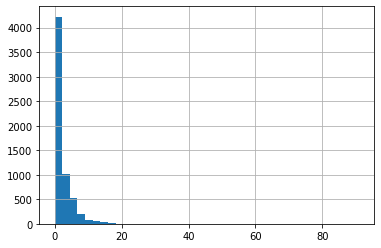

In [24]:
zinc_food_df['value'].hist(bins=40)

>### Statistische Analyse zum Nährstoffgehalt von 'Zink'

In [25]:
zinc_food_df['value'].describe()

count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64

>### Fragen: 

>#### Hat Edamer einen überdurchschnittlichen Zinkgehalt?

In [26]:
edam_cheese = zinc_food_df[zinc_food_df['food_desc'] == 'Cheese, edam']

if edam_cheese['value'].item() >= zinc_food_df['value'].mean():
  print("Ja, Edamer hat einen überdurchschnittlichen Zinkgehalt von {} mg.".format(edam_cheese['value'].item()))
else:
  print("Nein, Edamer hat einen unterdurchschnittlichen Zinkgehalt von {} mg.".format(edam_cheese['value'].item()))

Ja, Edamer hat einen überdurchschnittlichen Zinkgehalt von 3.75 mg.


>#### Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt? 

In [27]:
percentile_75 = zinc_food_df['value'].describe().transpose()['75%']

if percentile_75 >= zinc_food_df['value'].mean():
  print("75% aller Nahrungsmittel haben einen überdurchschnittlichen Zinkgehalt von {} mg".format(percentile_75))
else:
  print("75% aller Nahrungsmittel haben einen unterdurchschnittlichen Zinkgehalt von {} mg".format(percentile_75))

75% aller Nahrungsmittel haben einen überdurchschnittlichen Zinkgehalt von 2.98 mg


>#### Welches Nahrungsmittel hat den maximalen Zinkgehalt?

In [28]:
highest_zinc_food = zinc_food_df.sort_values(by=['value'], ascending=False).head(1)

print("Das Nahrungsmittel mit dem höchsten Zinkgehalt ist '{}' mit {} mg".format(highest_zinc_food['food_desc'].item(), highest_zinc_food['value'].item()))

Das Nahrungsmittel mit dem höchsten Zinkgehalt ist 'Mollusks, oyster, eastern, canned' mit 90.95 mg


# 3. Versionsübersicht

In [30]:
!pip install version_information
%reload_ext version_information
%version_information numpy, pandas

Software versions
Python 3.6.12 64bit [GCC 9.3.0]
IPython 7.16.1
OS Linux 5.4.0 52 generic x86_64 with debian bullseye sid
numpy 1.19.2
pandas 1.1.3
Mon Oct 26 08:25:30 2020 CET